###  Visulisation des données géographiques

In [30]:
import os
os.chdir("C:\\Users\\HP")
os.getcwd()

In [31]:
pip install --upgrade botocore==1.23.26

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

aiobotocore 2.4.1 requires botocore<1.27.60,>=1.27.59, but you'll have botocore 1.23.26 which is incompatible.



  Using cached botocore-1.23.26-py3-none-any.whl (8.5 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.27.59
    Uninstalling botocore-1.27.59:
      Successfully uninstalled botocore-1.27.59


In [32]:
pip install --upgrade urllib3==1.25.4 

Requirement already up-to-date: urllib3==1.25.4 in c:\users\hp\anaconda3\lib\site-packages (1.25.4)
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install py7zr

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install s3fs

  Using cached botocore-1.27.59-py3-none-any.whl (9.1 MB)
  Attempting uninstall: botocore
    Found existing installation: botocore 1.23.26
    Uninstalling botocore-1.23.26:
      Successfully uninstalled botocore-1.23.26
Note: you may need to restart the kernel to use updated packages.


In [35]:
! git clone https://github.com/InseeFrLab/cartogether.git

Cloning into 'cartogether'...


In [36]:
%cd ./cartogether

C:\Users\HP\cartogether


In [37]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install .

Processing c:\users\hp\cartogether
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for cartiflette: filename=cartiflette-0.0.1-py3-none-any.whl size=19738 sha256=bed4e1ea0dccad1c4eced41bb799e5f00cb28b3ff31d364dcd87abde65b9f155
  Stored in directory: C:\Users\HP\AppData\Local\Temp\pip-ephem-wheel-cache-ip6b7jrc\wheels\a6\a3\85\8db43ab18a25aeeeb3e71ea315ce1e44376b0547da6c2c6797Note: you may need to restart the kernel to use updated packages.

Successfully built cartiflette
  Attempting uninstall: cartiflette
    Found existing installation: cartiflette 0.0.1
    Uninstalling cartiflette-0.0.1:
      Successfully uninstalled cartiflette-0.0.1


In [39]:
conda install shapely


Note: you may need to restart the kernel to use updated packages.Solving environment: ...working... done


# All requested packages already installed.

Retrieving notices: ...working... done


In [40]:
conda install -c conda-forge shapely

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [41]:
conda update -n base -c defaults conda

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import geopandas

In [20]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [44]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


### Import des carreaux de filosofi transformés

In [49]:
import pandas as pd
import numpy as np

In [50]:
os.chdir("C:\\Users\\HP")

In [55]:
carr = pd.read_csv("Carreaux.csv")
carr.head()

,Id_carr_n
0,CRS3035RES1000mN2034000E4252000
1,CRS3035RES1000mN2034000E4253000
2,CRS3035RES1000mN2035000E4252000
3,CRS3035RES1000mN2035000E4253000
4,CRS3035RES1000mN2044000E4253000


In [52]:
# Création des points des rectangles

In [63]:
# Le premier point
carr["px_1"] = carr["Id_carr_n"].apply(lambda x: int(x.split('N')[1].split('E')[1]))
carr["py_1"] = carr["Id_carr_n"].apply(lambda x: int(x.split('N')[1].split('E')[0]))

In [66]:
carr.head()

,Id_carr_n,px_1,py_1,px_2,py_2
0,CRS3035RES1000mN2034000E4252000,4252000,2034000,4253000,2035000
1,CRS3035RES1000mN2034000E4253000,4253000,2034000,4254000,2035000
2,CRS3035RES1000mN2035000E4252000,4252000,2035000,4253000,2036000
3,CRS3035RES1000mN2035000E4253000,4253000,2035000,4254000,2036000
4,CRS3035RES1000mN2044000E4253000,4253000,2044000,4254000,2045000


In [65]:
# Les autres coordonnées
carr["px_2"] = carr["px_1"] + carr["Id_carr_n"].apply(lambda x: int(x.split('mN')[0].split('RES')[1]))
carr["py_2"] = carr["py_1"] + carr["Id_carr_n"].apply(lambda x: int(x.split('mN')[0].split('RES')[1]))

In [73]:
# Création de la variable geometry
    #Bibliothèques nécessaires
import geopandas
from geopandas import GeoSeries
from shapely.geometry import Polygon    

In [80]:
carr["geometry"] = carr.apply(lambda a : Polygon([(a['px_1'], a['py_1']), (a['px_2'], a['py_1']), 
                                                  (a['px_2'], a['py_2']), (a['px_1'], a['py_2'])]), axis = 1)

In [82]:
carr.head()

,Id_carr_n,px_1,py_1,px_2,py_2,geometry
0,CRS3035RES1000mN2034000E4252000,4252000,2034000,4253000,2035000,"POLYGON ((4252000 2034000, 4253000 2034000, 42..."
1,CRS3035RES1000mN2034000E4253000,4253000,2034000,4254000,2035000,"POLYGON ((4253000 2034000, 4254000 2034000, 42..."
2,CRS3035RES1000mN2035000E4252000,4252000,2035000,4253000,2036000,"POLYGON ((4252000 2035000, 4253000 2035000, 42..."
3,CRS3035RES1000mN2035000E4253000,4253000,2035000,4254000,2036000,"POLYGON ((4253000 2035000, 4254000 2035000, 42..."
4,CRS3035RES1000mN2044000E4253000,4253000,2044000,4254000,2045000,"POLYGON ((4253000 2044000, 4254000 2044000, 42..."


In [84]:
# Création d'un géodataframe
gcarr = geopandas.GeoDataFrame(carr, geometry='geometry', crs="EPSG:3035")

<AxesSubplot:>

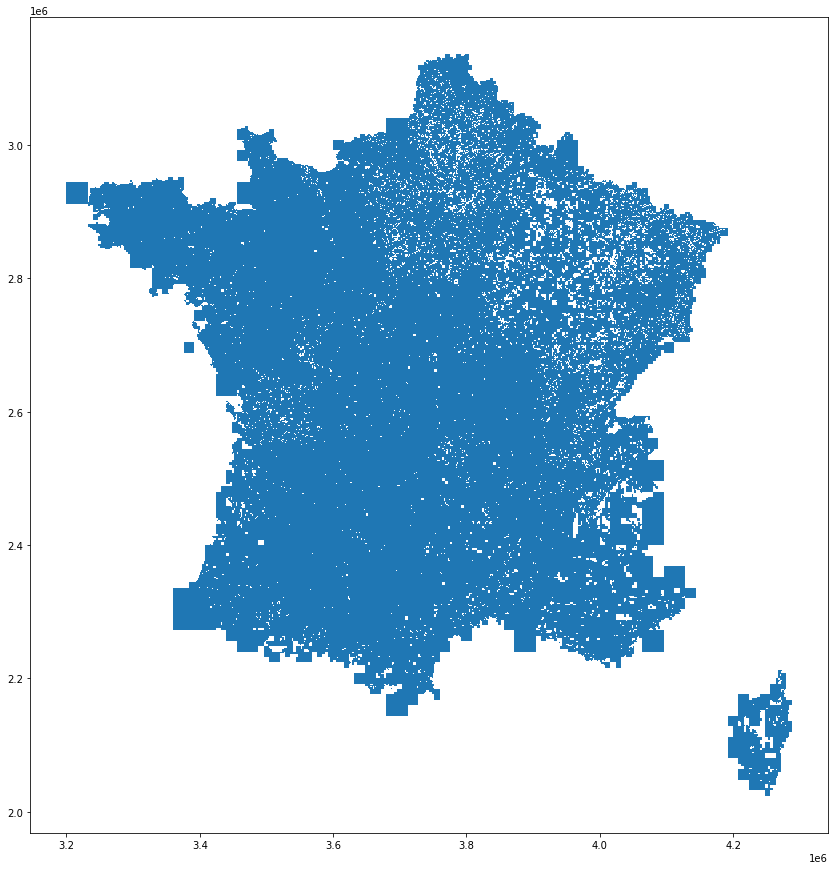

In [86]:
gcarr.plot(figsize=(15,15))

In [87]:
# Export du fichier en csvvv
gcarr.to_csv("Géographiques_carreaux.csv", index = False)

In [ ]:
v